## Crime Patterns and Arrest Trends Due to SocioEconomic Disparity: A Data Science Analysis
### Project Introduction
Our project investigates disparities in crime and arrest trends across neighborhoods in NYC, with a focus on how these trends correlate with income levels, race demographics, and geographic location.
#### Research Questions
- **Do crime and arrest rates vary by location?** | **Do areas with lower income experience higher police activity and crime rates?** | **Do we see similar trends of systematic discrimination in areas with higher population of people of color?**
#### Data Sources
- **NYPD Shooting Incident | Data** **NYC Crimes 2001–Present** |  **NYC Arrests Data**
### Project Status
Since our check-in proposal slides, there has been a significant change to the project scope. Initially, we planned to analyze crime and arrest trends using datasets from Chicago. However, due to data limitations, we decided to switch our focus to datasets from the NYPD. This change aligns with our original objective of analyzing crime and arrest trends by location,and racial demographics.

In [4]:
import pandas as pd
import numpy as np
import re                        
from datetime import datetime
import zipfile
import matplotlib.pyplot as plt   
import seaborn as sns
import plotly.express as px

In [5]:
with zipfile.ZipFile("NYPD_Hate_Crimes.zip", "r") as z:
    with z.open("NYPD_Hate_Crimes.csv") as f:
        df_hate_crimes = pd.read_csv(f)
columns_to_drop = ['Complaint Precinct Code', 'Law Code Category Description',  'PD Code Description','Bias Motive Description','Month Number','Patrol Borough Name','Full Complaint ID']
df_hate_crimes = df_hate_crimes.drop(columns=[col for col in columns_to_drop if col in  df_hate_crimes.columns])
df_hate_crimes = df_hate_crimes.drop_duplicates()
df_hate_crimes = df_hate_crimes.dropna()
#print(df_hate_crimes.head())

In [6]:
with zipfile.ZipFile("NYPD_Arrest_Data__Year_to_Date_.zip", "r") as z:
    with z.open("NYPD_Arrest_Data__Year_to_Date_.csv") as f:
        df_arrest = pd.read_csv(f)
df_arrest.replace("(null)", np.nan, inplace=True)
#print("Columns in the Arrest DataFrame:")
#print(df_arrest.columns)
columns_to_drop = ['PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE', 'LAW_CAT_CD','JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD','Latitude', 'Longitude', 'New Georeferenced Column'
]
columns_to_drop = [col for col in columns_to_drop if col in df_arrest.columns]
#print(f"Columns to drop: {columns_to_drop}")
df_arrest.drop(columns=columns_to_drop, inplace=True)
df_arrest.dropna(inplace=True)
#print("Cleaned Arrest DataFrame:")
#print(df_arrest.head())

In [7]:
df_shooting = pd.read_csv("NYPD_shooting_incident_data__Historic__.csv")
df_shooting.replace("(null)", np.nan, inplace=True)
columns_to_keep = ['OCCUR_DATE', 'BORO', 'VIC_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'PERP_SEX', 'PERP_RACE', 'PRECINCT']
df_shooting = df_shooting[columns_to_keep]
df_shooting.dropna(inplace=True)
#print(df_shooting.head())

In [8]:
df_hate_crimes.rename(columns={'Arrest Date': 'DATE', 'County': 'BORO'}, inplace=True)
df_hate_crimes['DATE'] = pd.to_datetime(df_hate_crimes['DATE'])
df_arrest.rename(columns={'ARREST_DATE': 'DATE', 'ARREST_BORO': 'BORO'}, inplace=True)
df_arrest['DATE'] = pd.to_datetime(df_arrest['DATE'])
df_shooting.rename(columns={'OCCUR_DATE': 'DATE'}, inplace=True)
df_shooting['DATE'] = pd.to_datetime(df_shooting['DATE'])
merged_df = pd.merge(df_arrest, df_shooting, on=['DATE', 'BORO'], how='outer')
merged_df = pd.merge(merged_df, df_hate_crimes, on=['DATE', 'BORO'], how='outer')
#print(merged_df.head())
merged_df.to_csv("merged_nypd_data.csv", index=False)
print(merged_df.head(2))

   ARREST_KEY       DATE OFNS_DESC   BORO  ARREST_PRECINCT AGE_GROUP  \
0         NaN 2006-01-01       NaN  BRONX              NaN       NaN   
1         NaN 2006-01-01       NaN  BRONX              NaN       NaN   

  PERP_SEX_x PERP_RACE_x        VIC_RACE VIC_AGE_GROUP VIC_SEX PERP_SEX_y  \
0        NaN         NaN           BLACK           <18       M          M   
1        NaN         NaN  WHITE HISPANIC         18-24       M          M   

      PERP_RACE_y  PRECINCT  Complaint Year Number Record Create Date  \
0           BLACK      48.0                    NaN                NaN   
1  WHITE HISPANIC      44.0                    NaN                NaN   

  Offense Description Offense Category Arrest Id  
0                 NaN              NaN       NaN  
1                 NaN              NaN       NaN  


In [9]:
race_counts = merged_df['PERP_RACE_y'].value_counts()
#print(race_counts)
race_counts = merged_df['VIC_RACE'].value_counts()
#print(race_counts)
sex_counts = merged_df['PERP_SEX_y'].value_counts()
#print(sex_counts)
age_group_counts = merged_df['AGE_GROUP'].value_counts()
#print(age_group_counts)
age_group_counts = merged_df['AGE_GROUP'].value_counts()
#print(age_group_counts)
merged_df['BORO'] = merged_df['BORO'].replace({
    'K': 'BROOKLYN', 
    'M': 'MANHATTAN', 
    'B': 'BRONX', 
    'Q': 'QUEENS', 
    'S': 'STATEN ISLAND',
    'KINGS': 'BROOKLYN',
    'NEW YORK': 'MANHATTAN',
    'RICHMOND': 'STATEN ISLAND'})
boro_counts = merged_df['BORO'].value_counts()
#print(boro_counts)
offense_desc_counts = merged_df['OFNS_DESC'].value_counts()
#print(offense_desc_counts)
precinct_counts = merged_df['PRECINCT'].value_counts()
#print(precinct_counts)

# Exploratory Data Analysis: Merged DATASET
This EDA explores a dataset of arrest records from NYC, including details about arrests, perpetrators, victims, and locations. We highlight key trends and summarize the dataset below.
#### Data Description
The dataset contains the following columns:
**ARREST_KEY:** A unique identifier for each arrest.  **DATE:** The date of the arrest or incident. **OFNS_DESC:** Offense description. **BORO:** The NYC borough where the arrest occurred. **ARREST_PRECINCT:** The precinct where the arrest was made. **AGE_GROUP:** Age group of the perpetrator. **PERP_SEX_x:** Sex of the perpetrator. **PERP_RACE_x:** Race of the perpetrator. **VIC_RACE:** Race of the victim. **VIC_AGE_GROUP:** Age group of the victim. **VIC_SEX:** Sex of the victim. **PERP_SEX_y:** Another column for perpetrator sex.**PERP_RACE_y:** Another column for perpetrator race. **PRECINCT:** Precinct number, likely related to the incident. **Complaint Year Number:** Year of the complaint. **Record Create Date:** Date the record was created. **Offense Description:** Detailed offense description.**Offense Category:** Category of the offense. **Arrest Id:** Another identifier for the arrest.
#### FINDINGS OF MERGED DATA 
##### 1. **Racial Distribution of Crime Perpetrators(PERP_RACE_y)?**
- **BLACK:** 11,967 incidents **WHITE HISPANIC:** 2,517 incidents **UNKNOWN:** 1,837 incidents **BLACK HISPANIC:** 1,398 incidents **WHITE:** 298 incidents **ASIAN / PACIFIC ISLANDER:** 170 incidents **AMERICAN INDIAN/ALASKAN NATIVE:** 2 incidents
##### 2. **Racial Distribution of Crime Victims (VIC_RACE)**
- **BLACK:** 12,335 victims **WHITE HISPANIC:** 3,064 victims **BLACK HISPANIC:** 1,852 victims **WHITE:** 563 victims **ASIAN / PACIFIC ISLANDER:** 316 victims **UNKNOWN:** 51 victims **AMERICAN INDIAN/ALASKAN NATIVE:** 8 victims
##### 3. **Borough Distribution:**
- **Brooklyn (K):** 72,325 incidents **Manhattan (M):** 61,969 incidents **Bronx (B):** 58,521 incidents **Queens (Q):** 56,633 incidents **Staten Island (S):** 11,055 incidents
##### 4. **Age Group Distribution:**
- **25-44 years:** 152,034 incidents **45-64 years:** 51,121 incidents **18-24 years:** 43,174 incidents **Under 18 years:** 9,525 incidents **65+ years:** 4,649 incidents
#### Preliminary Conclusions
- **Victim Profile:** Most victims are male, with **Black** being the most common race among victims in the sample.
- **Perpetrator Profile:** Perpetrators are predominantly **male**, and the most common races among perpetrators are **Black** and **White Hispanic**.

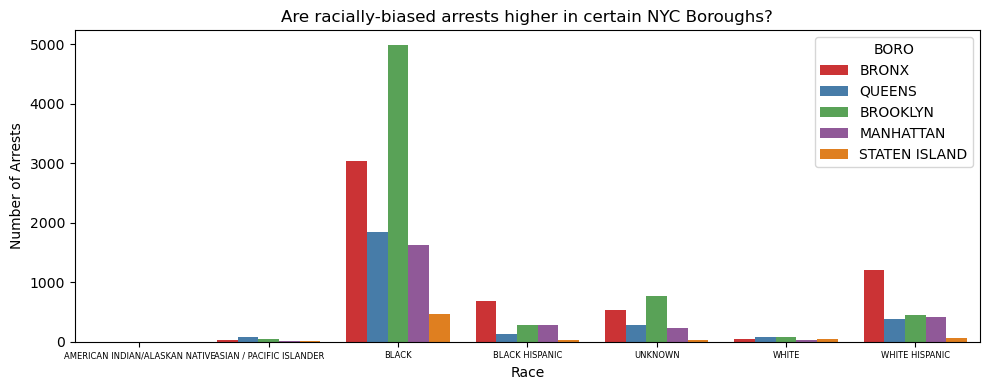

In [10]:
bias_race_boro = merged_df[['PERP_RACE_y', 'BORO']].dropna()
race_boro_counts = bias_race_boro.groupby(['PERP_RACE_y', 'BORO']).size().reset_index(name='Arrest Count')
plt.figure(figsize=(10, 4))
sns.barplot(data=race_boro_counts, x='PERP_RACE_y', y='Arrest Count', hue='BORO', palette='Set1')
plt.title('Are racially-biased arrests higher in certain NYC Boroughs?' )
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.xticks(fontsize=6)
plt.tight_layout()
plt.show()

In [11]:
'''import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.dummy import DummyClassifier
dtype_dict = {'VIC_RACE': str,'VIC_AGE_GROUP': str,'VIC_SEX': str,'PERP_SEX_y': str,'PERP_RACE_y': str,'PRECINCT': float,'Complaint Year Number': str,'Record Create Date': str,'Arrest Id': str,'Offense Description': str,'Offense Category': str
}
df = pd.read_csv("merged_nypd_data.csv", dtype=dtype_dict, low_memory=False)
df.drop(columns=[
    'ARREST_KEY', 'DATE', 'Record Create Date', 'Arrest Id',
    'Complaint Year Number', 'PERP_SEX_x', 'PERP_RACE_x',
    'CS 418 Final Project.ipynb'
], inplace=True, errors='ignore')
df = df.dropna(subset=['Offense Category'])
df = df.loc[:, df.notna().any()]
imputer = SimpleImputer(strategy='most_frequent')
df_imputed_array = imputer.fit_transform(df)
valid_columns = df.columns[imputer.statistics_ != None]
df_imputed = pd.DataFrame(df_imputed_array, columns=valid_columns)
df_encoded = pd.get_dummies(df_imputed)
target_cols = [col for col in df_encoded.columns if col.startswith('Offense Category_')]
X = df_encoded.drop(columns=target_cols)
y = df_encoded[target_cols].idxmax(axis=1).str.replace('Offense Category_', '')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\n Baseline Accuracy (Most Frequent Class):", accuracy_score(y_test, y_dummy))'''

'import numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report, accuracy_score\nfrom sklearn.dummy import DummyClassifier\ndtype_dict = {\'VIC_RACE\': str,\'VIC_AGE_GROUP\': str,\'VIC_SEX\': str,\'PERP_SEX_y\': str,\'PERP_RACE_y\': str,\'PRECINCT\': float,\'Complaint Year Number\': str,\'Record Create Date\': str,\'Arrest Id\': str,\'Offense Description\': str,\'Offense Category\': str\n}\ndf = pd.read_csv("merged_nypd_data.csv", dtype=dtype_dict, low_memory=False)\ndf.drop(columns=[\n    \'ARREST_KEY\', \'DATE\', \'Record Create Date\', \'Arrest Id\',\n    \'Complaint Year Number\', \'PERP_SEX_x\', \'PERP_RACE_x\',\n    \'CS 418 Final Project.ipynb\'\n], inplace=True, errors=\'ignore\')\ndf = df.dropna(subset=[\'Offense Category\'])\ndf = df.loc[:, df.notna().any()]\nimputer = SimpleImputer(strategy=\'most_frequent\')\ndf_imputed_

In [12]:
dtype_spec = {
    'ARREST_KEY': 'str', 'DATE': 'str', 'PERP_RACE_y': 'category',
    'VIC_RACE': 'category', 'BORO': 'category', 'Offense Category': 'category'
}
df = pd.read_csv("merged_nypd_data.csv", dtype=dtype_spec, low_memory=False)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df["ARREST_MADE"] = df["ARREST_KEY"].notna().astype(int)
features = ["BORO", "PERP_RACE_y", "VIC_RACE", "Offense Category"]
X = df[features]
y = df["ARREST_MADE"]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = encoder.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5761
           1       1.00      1.00      1.00     78232

    accuracy                           1.00     83993
   macro avg       1.00      1.00      1.00     83993
weighted avg       1.00      1.00      1.00     83993



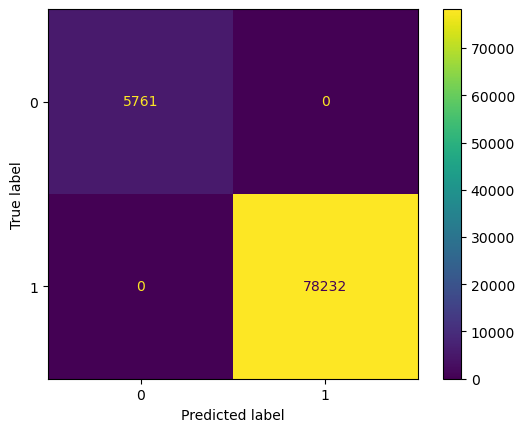

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

In [14]:
!pip install xgboost

In [15]:
import xgboost as xgb
print(xgb.__version__)  

3.0.0


In [16]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    scale_pos_weight=sum(y == 0) / sum(y == 1), 
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5761
           1       1.00      1.00      1.00     78232

    accuracy                           1.00     83993
   macro avg       1.00      1.00      1.00     83993
weighted avg       1.00      1.00      1.00     83993



REFLECTION:
In our final project, we've tackled challenges with integrating complex NYPD data sets, uncovering crime rate patterns and arrest biases which highlight socio-economic impacts. We've managed initial visualizations and are now focused on enhancing our machine learning model's predictive accuracy, which is currently underperforming. As we slightly lag behind schedule in model analysis, no major changes to the project scope are planned yet. Our next steps include refining data processes and drafting our final report, relying on our team's strong collaboration to navigate these challenges.